Vamos a trabajar con el siguiente dataset
* https://datosabiertos.malaga.eu/dataset/lecturas-cuadros-electricos-marzo-2017

In [1]:
import pandas as pd

In [26]:
data_mar = pd.read_csv("201703.csv", sep=";")
data_mar.head()

,ID_NODO,ID_DIA,FECHA_TOMA_DATO,ENERGIA_ACTIVA_ACUMULADA,LECTURA_ENERGIA_ACTIVA,ENERGIA_REACTIVA_ACUMULADA,LECTURA_ENERGIA_REACTIVA,POTENCIA_TOTAL_ACUMULADA,LECTURA_POTENCIA_TOTAL
0,81848,28,2017-02-28 23:11:54,66884.601562,0.000000,46464.699219,0.000000,0.000000,0.0
1,98372,28,2017-02-28 23:11:54,264010.593750,0.000000,169612.296875,0.000000,0.000000,0.0
2,98526,28,2017-02-28 23:11:54,56888.000000,0.398438,61891.300781,0.000000,14.000000,0.0
3,98680,28,2017-02-28 23:11:54,35347.699219,0.398438,37424.699219,0.398438,77.006493,0.0
4,98834,28,2017-02-28 23:11:54,93080.703125,0.000000,47944.500000,0.000000,0.000000,0.0


In [27]:
data_mar.describe()

,ID_NODO,ID_DIA,ENERGIA_ACTIVA_ACUMULADA,LECTURA_ENERGIA_ACTIVA,ENERGIA_REACTIVA_ACUMULADA,LECTURA_ENERGIA_REACTIVA,POTENCIA_TOTAL_ACUMULADA,LECTURA_POTENCIA_TOTAL
count,413108.000000,413108.000000,4.131080e+05,4.131080e+05,4.131080e+05,4.131080e+05,413108.000000,413108.000000
mean,71962.043165,15.982503,2.330070e+05,1.268065e+02,1.679989e+05,1.002321e+02,2291.475042,42.950668
std,26718.517878,8.936663,1.130742e+06,2.271224e+04,8.109683e+05,1.819730e+04,12654.772009,1263.035618
min,540.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,70605.000000,8.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,76150.000000,16.000000,2.475400e+03,0.000000e+00,3.182920e+04,0.000000e+00,0.000000,0.000000
75%,81540.000000,24.000000,1.568925e+05,0.000000e+00,9.713650e+04,0.000000e+00,3.000000,0.000000
max,103620.000000,31.000000,1.267291e+07,1.148814e+07,9.325143e+06,9.117862e+06,234922.625488,216123.260318


In [28]:
data_mar.shape

(413108, 9)

* Energía activa: los receptores eléctricos alimentados por corriente eléctrica transforman la energía eléctrica en trabajo mecánico y en calor. A este efecto útil se le denomina “energía activa” y se mide en kWh.

* Energía reactiva: existen numerosos receptores, tales como motores, transformadores, reactancias, etc., que para funcionar necesitan que se formen campos magnéticos. Estos equipos, en general inductivos, absorben energía de la red para crear los campos magnéticos y la devuelven mientras desaparecen. Con este intercambio de energía, se provoca un consumo suplementario que no es aprovechable por los receptores. Se mide en kVArh. La energía reactiva provoca una sobrecarga en líneas, transformadores y generadores, sin llegar a producir un rendimiento útil. Sin embargo, la factura de energía sí la contabiliza, por lo que puede llegar a incrementarla en cantidades importantes 

In [29]:
# Borramos los campos que no vamos a necesitar: LECTURA_ENERGIA_ACTIVA, LECTURA_ENERGIA_REACTIVA, LECTURA_POTENCIA_TOTAL
campos = data_mar.columns.values.tolist()
eliminar = ["LECTURA_ENERGIA_ACTIVA", "LECTURA_ENERGIA_REACTIVA", "LECTURA_POTENCIA_TOTAL"]
data_mar = data_mar[[e for e in campos if e not in eliminar]]

In [30]:
# vamos a crear un campo nuevo para la fecha en formato timestamp, que nos será más cómodo a la hora de representar las gráficas.
data_mar["FECHA_NUM"] = pd.to_numeric(pd.to_datetime(data_mar["FECHA_TOMA_DATO"]))
data_mar.head()

,ID_NODO,ID_DIA,FECHA_TOMA_DATO,ENERGIA_ACTIVA_ACUMULADA,ENERGIA_REACTIVA_ACUMULADA,POTENCIA_TOTAL_ACUMULADA,FECHA_NUM
0,81848,28,2017-02-28 23:11:54,66884.601562,46464.699219,0.000000,1488323514000000000
1,98372,28,2017-02-28 23:11:54,264010.593750,169612.296875,0.000000,1488323514000000000
2,98526,28,2017-02-28 23:11:54,56888.000000,61891.300781,14.000000,1488323514000000000
3,98680,28,2017-02-28 23:11:54,35347.699219,37424.699219,77.006493,1488323514000000000
4,98834,28,2017-02-28 23:11:54,93080.703125,47944.500000,0.000000,1488323514000000000


Vamos a examinar un nodo para ver cómo se comportan los datos para un sólo individuo de la muestra

In [31]:
# ¿cuantos nodos tenemos?
len(data_mar["ID_NODO"].unique())

139

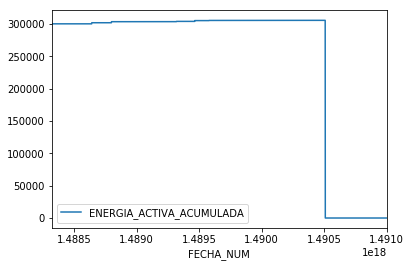

In [32]:
# vamos a estudiar un nodo al azar: el ID_NODO = 542
data_mar[data_mar["ID_NODO"] == 543].plot(x="FECHA_NUM", y="ENERGIA_ACTIVA_ACUMULADA")

Observamos en la gráfica que a partir de cierta fecha el acumulado de energía activa es cero. Si probamos con otros nodos vemos que el patrón se repite. Además, si examinamos las fechas de las lecturas vemos que hay datos del mes anterior (febrero). Un posible interpretación que podemos hacer es que el periodo de lecturas no comienza exactamente el día 1 del mes en curso.

In [33]:
# veamos las fechas para las que las lecturas son cero
data_mar[(data_mar["ENERGIA_ACTIVA_ACUMULADA"]==0) & (data_mar["ID_NODO"]==542)].head()

,ID_NODO,ID_DIA,FECHA_TOMA_DATO,ENERGIA_ACTIVA_ACUMULADA,ENERGIA_REACTIVA_ACUMULADA,POTENCIA_TOTAL_ACUMULADA,FECHA_NUM
337194,542,26,2017-03-26 06:27:10,0.0,0.0,0.0,1490509630000000000
337342,542,26,2017-03-26 06:42:10,0.0,0.0,0.0,1490510530000000000
337468,542,26,2017-03-26 06:57:10,0.0,0.0,0.0,1490511430000000000
337492,542,26,2017-03-26 07:12:10,0.0,0.0,0.0,1490512330000000000
337759,542,26,2017-03-26 07:27:10,0.0,0.0,0.0,1490513230000000000


Tenemos dos opciones. Podemos borrar los datos anteriores o posteriores a una fecha concreta. Otra opción es eliminar aquellas lecturas cuyo valor para el campo ENERGIA_ACTIVA_ACUMULADA sea 0. Para ver un ejemplo de cada, vamos a borrar las filas que pertenecen al mes anterior y seguidamente vamos a eliminar todas las filas cuyo campo ENERGIA_ACTIVA_ACUMULADA sea 0.

In [34]:
# borramos datos del mes anterior
data_mar = data_mar[data_mar["FECHA_TOMA_DATO"]>"2017-03"]
data_mar.head()

,ID_NODO,ID_DIA,FECHA_TOMA_DATO,ENERGIA_ACTIVA_ACUMULADA,ENERGIA_REACTIVA_ACUMULADA,POTENCIA_TOTAL_ACUMULADA,FECHA_NUM
556,542,1,2017-03-01 00:11:54,360591.906250,121981.601562,0.000000,1488327114000000000
557,543,1,2017-03-01 00:11:54,300521.894531,242683.304688,0.000000,1488327114000000000
558,544,1,2017-03-01 00:11:54,2475.300049,51700.800781,80.024994,1488327114000000000
559,545,1,2017-03-01 00:11:54,0.000000,26725.900391,0.000000,1488327114000000000
560,546,1,2017-03-01 00:11:54,0.000000,0.000000,0.000000,1488327114000000000


In [35]:
# borramos las filas donde se cumpla que ENERGIA_ACTIVA_ACUMULADA = 0 para todos los nodos
data_mar = data_mar[data_mar["ENERGIA_ACTIVA_ACUMULADA"]>0]
data_mar.shape

(237946, 7)

Podemos volver a examinar la gráfica que, ahora sí, nos permite comprender mejor cómo es la demanda de consumo para ese nodo.

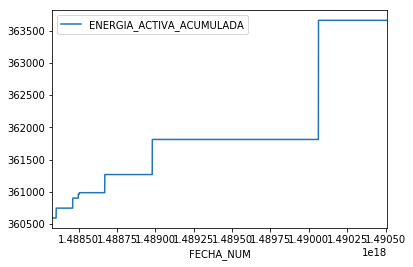

In [36]:
# creamos un dataframe con los datos del nodo 542
data_mar_542 = data_mar[data_mar["ID_NODO"] == 542]
data_mar_542.plot(x="FECHA_NUM", y="ENERGIA_ACTIVA_ACUMULADA")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c330d25c0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f6c3307ce48>], dtype=object)

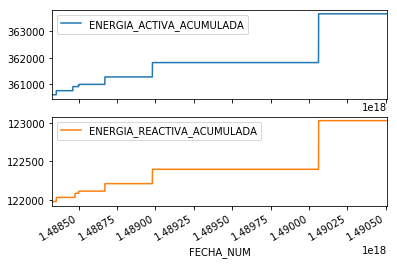

In [37]:
data_mar_542.plot(x="FECHA_NUM", y=["ENERGIA_ACTIVA_ACUMULADA","ENERGIA_REACTIVA_ACUMULADA"], subplots=True )

Aunque los valores de la energía reactiva son muy inferiores a los de la energía activa, parece que hay una correlación bastante acusada entre ambos tipos de energía. De hecho, si usamos la función corr() de Pandas para calcular la correlación entre ambos campos, vemos que es una correlación casi perfecta (0.99).

In [38]:
data_mar_542["ENERGIA_ACTIVA_ACUMULADA"].corr(data_mar_542["ENERGIA_REACTIVA_ACUMULADA"])

0.99990652807701275

La energía reactiva es un tipo de energía eléctrica, que absorben de la red algunos equipos eléctricos pero que luego la devuelven, por lo que no supone un consumo, aunque sí hay que generarla y transportarla hasta los equipos. Por ello las compañías eléctricas penalizan en factura el consumo de energía reactiva a partir de un cierto valor.
Si quisieramos hacer un análisis de en qué nodos hay un consumo anomalo de energía reactiva, podríamos ver si la relación entre la energía activa y reactive no tienen una correlación directa (aquí estoy haciendo muchas suposiciones que podrían no ser ciertas a nivel eléctrico, pero valga como ejemplo).
¿Se observará la misma correlación en todos los nodos? Vamos a crear un nuevo DataFrame la correlación entre ambas lecturas. 

In [39]:
# creamos un nuevo dataframe con los campos NODO_ID y la correlación
c = []
for i in data_mar["ID_NODO"].unique().tolist():
    c.append([i, data_mar[data_mar["ID_NODO"]==i]["ENERGIA_ACTIVA_ACUMULADA"].corr(data_mar["ENERGIA_REACTIVA_ACUMULADA"])])

correlaciones = pd.DataFrame(c, columns=["ID_NODO", "CORRELACION"])
correlaciones.head(10)

,ID_NODO,CORRELACION
0,542,0.999907
1,543,0.961227
2,544,0.999266
3,547,0.999963
4,33756,0.998668
5,71530,NaN
6,71838,NaN
7,71992,NaN
8,72454,0.999997
9,73224,NaN


Observamos que hay correlaciones que toman el valor NaN (Not A Number). ¿Qué ha pasado? Si generamos la gráfica de uno de los nodos cuya correlación es NaN vemos que el valor de ambas variables es siempre constante, es decir, no crece en todo el periodo de tiempo que estamos observando. Por defecto, Pandas calcula la correlación de pearson, cuya formula es cor(i,j) = cov(i,j)/[stdev(i)*stdev(j)]. Como la desviación estandad es cero y un divisor no puede ser cero, obtenemos un bonito NaN. Lo cuál, dicho sea de paso, nos viene de perlas para ver como tratar con valores nulos en un DataFrame.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c32f736d8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f6c32f98978>], dtype=object)

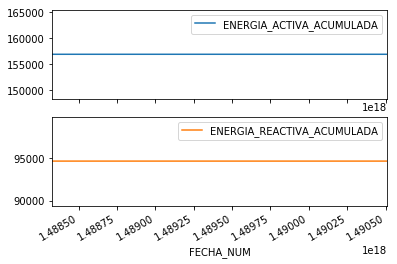

In [40]:
data_mar[data_mar["ID_NODO"]==71530].plot(x="FECHA_NUM", y=["ENERGIA_ACTIVA_ACUMULADA","ENERGIA_REACTIVA_ACUMULADA"], subplots=True )

Vamos a ver qué opciones tenemos para tratar con los valores nulos. Podemos:
* Eliminar las filas con valor nulo (con el método dropna())
* Rellenar las filas con un valor calculado (con el método fillna())

In [41]:
# rellenar filas NaN con un valor concreto (o en este caso)
cor_cero = correlaciones["CORRELACION"].fillna(0)
cor_cero.head(10)

0    0.999907
1    0.961227
2    0.999266
3    0.999963
4    0.998668
5    0.000000
6    0.000000
7    0.000000
8    0.999997
9    0.000000
Name: CORRELACION, dtype: float64

In [42]:
# rellenar filas con el valor medio de la columna (o cualquier otra función))
cor_media = correlaciones["CORRELACION"].fillna(correlaciones["CORRELACION"].mean())
cor_media.head(10)

0    0.999907
1    0.961227
2    0.999266
3    0.999963
4    0.998668
5    0.971874
6    0.971874
7    0.971874
8    0.999997
9    0.971874
Name: CORRELACION, dtype: float64

In [43]:
# pero en este caso vamos a optar por eliminarlas
# si axis=0 borra por filas. Si axis=1 borra por columnas
correlaciones = correlaciones.dropna(axis=0)
correlaciones.head(10)

,ID_NODO,CORRELACION
0,542,0.999907
1,543,0.961227
2,544,0.999266
3,547,0.999963
4,33756,0.998668
8,72454,0.999997
10,73840,0.999995
11,74918,0.999972
12,75072,0.999946
13,75534,0.999648


Si lo que queremos es estudiar cómo se comporta el consumo en los cuadros eléctricos donde hay baja correlación, podemos ordenar la lista para ver cuáles tienen peor correlación.

In [44]:
correlaciones = correlaciones.sort_values(by="CORRELACION")
correlaciones.head()

,ID_NODO,CORRELACION
90,52061,0.514461
61,75688,0.617365
84,52775,0.649950
67,77382,0.826462
40,100682,0.885768


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c32f220f0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f6c32eb1358>], dtype=object)

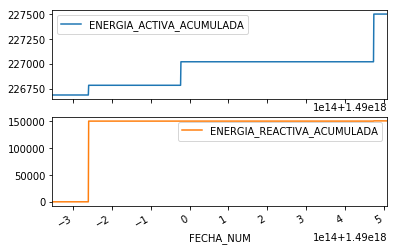

In [45]:
data_mar[data_mar["ID_NODO"]==52061].plot(x="FECHA_NUM", y=["ENERGIA_ACTIVA_ACUMULADA","ENERGIA_REACTIVA_ACUMULADA"], subplots=True )

A partir de esta información podríamos deducir que a ese cuadro eléctrico se conecta maquinaria que hace uso intensivo de campos eléctricos, como bobinas o motores.
Vamos ahora a ver cómo se comporta el campo POTENCIA_TOTAL_ACUMULADA. Miramos el primer nodo.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c32db4358>], dtype=object)

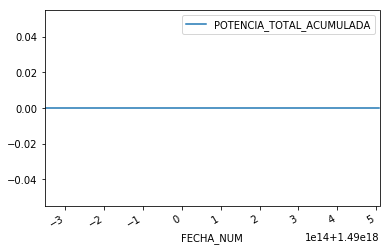

In [46]:
data_mar[data_mar["ID_NODO"]==52061].plot(x="FECHA_NUM", y=["POTENCIA_TOTAL_ACUMULADA"], subplots=True )

Está a cero, y si observamos otros nodos vemos que también. Como no tenemos más detalles sobre el dataset sólo podemos hacer suposiciones (como que por error no se ha rellenado). De todas formas nos viene bien para ver cómo podemos combinar valores de de dos o más campos para volcarlos en uno. Vamos a suponer que en este campo, el valor que debería haber es la suma de la energía activa y reactiva (en realidad ambos valores están en unidades distintas, pero por simplicidad supondremos que ambos valores son Kw/h y que podemos sumarlos alegremente). Vamos a conbinar pues las suma de los dos valores en el campo POTENCIA_TOTAL_ACUMULADA.

In [47]:
data_mar["POTENCIA_TOTAL_ACUMULADA"] = data_mar["ENERGIA_ACTIVA_ACUMULADA"] + data_mar["ENERGIA_REACTIVA_ACUMULADA"]
data_mar.head()

,ID_NODO,ID_DIA,FECHA_TOMA_DATO,ENERGIA_ACTIVA_ACUMULADA,ENERGIA_REACTIVA_ACUMULADA,POTENCIA_TOTAL_ACUMULADA,FECHA_NUM
556,542,1,2017-03-01 00:11:54,3.605919e+05,1.219816e+05,4.825735e+05,1488327114000000000
557,543,1,2017-03-01 00:11:54,3.005219e+05,2.426833e+05,5.432052e+05,1488327114000000000
558,544,1,2017-03-01 00:11:54,2.475300e+03,5.170080e+04,5.417610e+04,1488327114000000000
561,547,1,2017-03-01 00:11:54,4.085408e+06,3.286907e+06,7.372315e+06,1488327114000000000
566,33756,1,2017-03-01 00:11:54,1.144733e+07,8.198532e+06,1.964586e+07,1488327114000000000


En este momento tenemos, por un lado, el DataFrame con las lecturas de los cuadros y por otro un DataFrame con las correlaciones que hemos calculado. ¿Podemos agregar las correlaciones a la tabla principal? Claro. Esta operación se llama unión (join en inglés). Hay cuatro tipos: inner join, left join, right join y outer join. No voy a entrar en detalle ya que son los mismos que los de SQL. Si queréis saber más podéis consultar aquí: https://es.wikipedia.org/wiki/Join

In [48]:
# unimos los DataFrames con left join, ya que el segundo dataframe (correlaciones) tiene menos filas 
# y por lo tanto, no todos los nodos disponen de datos de correlación (recuerda que borramos los NaN)
data_mar = pd.merge(left=data_mar, right=correlaciones, how="left", left_on="ID_NODO", right_on="ID_NODO")
data_mar.head()

,ID_NODO,ID_DIA,FECHA_TOMA_DATO,ENERGIA_ACTIVA_ACUMULADA,ENERGIA_REACTIVA_ACUMULADA,POTENCIA_TOTAL_ACUMULADA,FECHA_NUM,CORRELACION
0,542,1,2017-03-01 00:11:54,3.605919e+05,1.219816e+05,4.825735e+05,1488327114000000000,0.999907
1,543,1,2017-03-01 00:11:54,3.005219e+05,2.426833e+05,5.432052e+05,1488327114000000000,0.961227
2,544,1,2017-03-01 00:11:54,2.475300e+03,5.170080e+04,5.417610e+04,1488327114000000000,0.999266
3,547,1,2017-03-01 00:11:54,4.085408e+06,3.286907e+06,7.372315e+06,1488327114000000000,0.999963
4,33756,1,2017-03-01 00:11:54,1.144733e+07,8.198532e+06,1.964586e+07,1488327114000000000,0.998668


Los parámetros left y right indican los DataFrames que vamos a fundir. El parámetro how nos permite indicar el tipo de join, en este caso left join. Finalmente left_on y right_on nos sirve para indicar cuál es el campo clave para unir ambos DataFrames. En este caso el campo común es ID_NODO.